# Mask galaxy plane density 

- author : Sylvie Dagoret-Campagne
- creation date : November 21 2020


In [5]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic
from astropy.io import fits

- find density map here:

http://alasky.u-strasbg.fr/footprints/tables/vizier/I_345_gaia2

In [2]:
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline
import healpy as hp 
import numpy as np

In [6]:
fits_image_filename="MOC-I_345_gaia2-512.fits"

In [7]:
hdu = fits.open(fits_image_filename)

In [12]:
hdu.info()

Filename: MOC-I_345_gaia2-512.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     16   38R x 1C   [1J]   


In [9]:
hdu[0].header

SIMPLE  =                    T / Written by MOC java API 4.1                    
BITPIX  =                    8                                                  
NAXIS   =                    0                                                  
EXTEND  =                    T                                                  

In [13]:
hdu[1].header

XTENSION= 'BINTABLE'           / HEALPix Multi Order Coverage map               
BITPIX  =                    8                                                  
NAXIS   =                    2                                                  
NAXIS1  =                    4                                                  
NAXIS2  =                   38                                                  
PCOUNT  =                    0                                                  
GCOUNT  =                    1                                                  
TFIELDS =                    1                                                  
TFORM1  = '1J      '                                                            
TTYPE1  = 'UNIQ    '           / HEALPix UNIQ pixel number                      
PIXTYPE = 'HEALPIX '           / HEALPix magic code                             
ORDERING= 'NUNIQ   '           / NUNIQ coding method                            
COORDSYS= 'C       '        

In [14]:
hdu[1].data

FITS_rec([(      4,), (      5,), (      6,), (      7,), (      8,),
          (      9,), (     10,), (     11,), (     12,), (     13,),
          (     15,), (     56,), (     58,), (     59,), (    228,),
          (    229,), (    230,), (    924,), (    925,), (    926,),
          (   3708,), (   3709,), (   3711,), (  14840,), (  14842,),
          (  14843,), (  59364,), (  59366,), (  59367,), ( 237460,),
          ( 237461,), ( 237462,), ( 949853,), ( 949854,), ( 949855,),
          (3799408,), (3799409,), (3799411,)],
         dtype=(numpy.record, [('UNIQ', '>i4')]))

# densityMap-I_345_gaia2-128.hpx

In [4]:
nside=512
npix=hp.nside2npix(nside)
map = hp.read_map(file)
resol= hp.pixelfunc.nside2resol(nside, arcmin=True)

/Users/dagoret/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:332: HealpixFitsWarning: No NSIDE in the header file : will use length of array
  "No NSIDE in the header file : will use length of array", HealpixFitsWarning


TypeError: unsupported format string passed to NoneType.__format__

In [230]:
resol2

27.483891294539248

In [231]:
imap2=map2.astype(np.int64)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


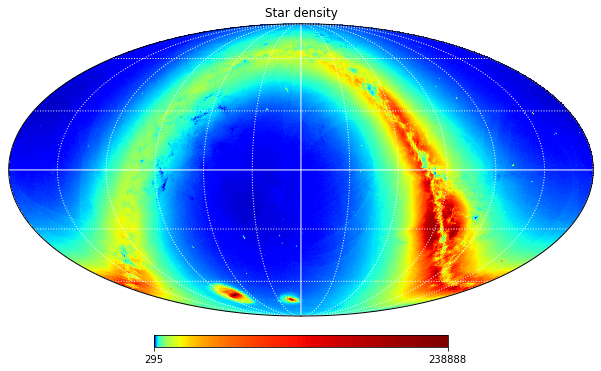

In [246]:
hp.mollview(imap2,norm='log',title='Star density',cmap="jet",xsize=2000)
hp.graticule(color="w")

In [233]:
def IndexToDeclRa(index,nside):
    theta,phi=hp.pixelfunc.pix2ang(nside,index)
    return -np.degrees(theta-np.pi/2.),np.degrees(np.pi*2.-phi)

def DeclRaToIndex(decl,RA,nside):
    return hp.pixelfunc.ang2pix(nside,np.radians(-decl+90.),np.radians(360.-RA))


In [234]:
npix2

196608

In [235]:
len(imap2)

196608

In [236]:
indexes=np.arange(npix2)

In [237]:
all_ra=np.zeros(npix2)
all_dec=np.zeros(npix2)
all_longgal=np.zeros(npix2)
all_latgal=np.zeros(npix2)

count=0
for idx in indexes:
    dec,ra=IndexToDeclRa(idx,nside2)
    all_ra[count]=ra
    all_dec[count]=dec
    count+=1

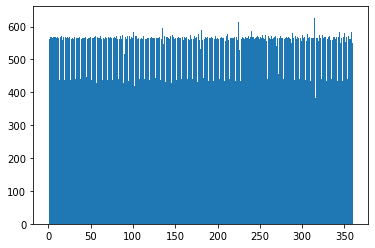

In [238]:
plt.hist(all_ra,bins=360);

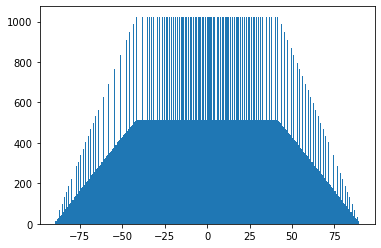

In [239]:
plt.hist(all_dec,bins=360);

In [240]:
my_skycoords = SkyCoord(all_ra*u.deg, all_dec*u.deg)  # using degrees directly

In [241]:
my_skycoordgal=my_skycoords.galactic

In [242]:
galactic_plane_indexes=np.where(np.abs(my_skycoordgal.b.deg)<5)[0]

In [243]:
galactic_plane_indexes

array([  7548,   7549,   7550, ..., 189161, 189162, 189163])

In [244]:
imapcut=np.copy(imap2)
imapcut[galactic_plane_indexes]=imap2.min()

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


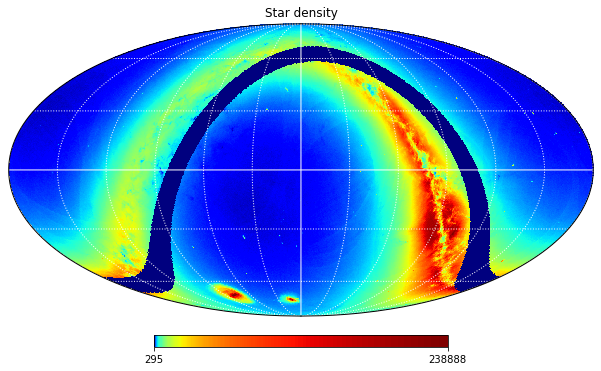

In [245]:
hp.visufunc.mollview(imapcut,norm='log',title='Star density',cmap="jet",xsize=2000)
hp.graticule(color="w")